In [1]:
# external packages
import os
import sys
from argparse import Namespace
from pathlib import Path

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import yaml
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms

# own code
sys.path.append('../')
from train_fib_segmentation import init_model, load_dataset

You probably want to use `notebooks/plot_inferenced_segmentations.ipynb` instead, which assumes you already have performed inference.

In this notebook, segmentations are both inferenced and plotted, which is slower because we actually have to run the models.

# Deeprisk segmentation data

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
hparams = Namespace()
# choose dataset
hparams.dataset = 'deeprisk'
# reproducability
hparams.trainseed = 42
hparams.splitseed = 84
hparams.train_frac = 0.6
# paths
hparams.data_path = r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data"
hparams.img_path = r"all_niftis_n=657"
hparams.weak_labels_path = r"weak_labels_n=657.xlsx"
hparams.myoseg_path = r"myocard_predictions/deeprisk_myocardium_predictions"
hparams.pseudoseg_path = r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_classification_2D\drnd_myo_input\version_1\pseudolabels"
hparams.gt_seg_dir = r"fibrosis_labels_n=117"
hparams.gt_myoseg_dir = r"myo_labels_n=117"

# data augmentation
hparams.img_type = 'PSIR'
hparams.image_norm = "per_image"
hparams.no_roi_crop = False
hparams.include_no_myo = True
hparams.roi_crop = "fixed" # "fitted", or "fixed"
hparams.center_crop = 224
hparams.input_size = 224
hparams.rotate = 0
hparams.translate = (0, 0)
hparams.scale = (1, 1)
hparams.shear = (0, 0, 0, 0)
hparams.brightness = 0
hparams.contrast = 0
hparams.hflip = 0.0
hparams.vflip = 0.0
hparams.randomaffine_prob=0
hparams.randomcrop=False
hparams.randomcrop_prob = 0.0
hparams.randomerasing_probs = []
hparams.train_with_gt = False
print(f'{hparams=}')

pl.seed_everything(hparams.trainseed, workers=True)
# prepare dataloaders
dataset_train, dataset_val, dataset_test = load_dataset(hparams)
print(f"Train data: {len(dataset_train)}, validation data {len(dataset_val)}")

train_loader = DataLoader(dataset_train,
                            batch_size=1,
                            shuffle=False,
                            drop_last=False,
                            num_workers=1)
val_loader = DataLoader(dataset_val,
                        batch_size=1,
                        shuffle=False,
                        drop_last=False,
                        num_workers=1)

test_loader = DataLoader(dataset_test,
                        batch_size=1,
                        shuffle=False,
                        drop_last=False,
                        num_workers=1)


Global seed set to 42


hparams=Namespace(dataset='deeprisk', trainseed=42, splitseed=84, train_frac=0.6, data_path='\\\\amc.intra\\users\\R\\rcklein\\home\\deeprisk\\weakly_supervised\\data', img_path='all_niftis_n=657', weak_labels_path='weak_labels_n=657.xlsx', myoseg_path='myocard_predictions/deeprisk_myocardium_predictions', pseudoseg_path='\\\\amc.intra\\users\\R\\rcklein\\home\\deeprisk\\weakly_supervised\\tb_logs_classification_2D\\drnd_myo_input\\version_1\\pseudolabels', gt_seg_dir='fibrosis_labels_n=117', gt_myoseg_dir='myo_labels_n=117', img_type='PSIR', image_norm='per_image', no_roi_crop=False, include_no_myo=True, roi_crop='fixed', center_crop=224, input_size=224, rotate=0, translate=(0, 0), scale=(1, 1), shear=(0, 0, 0, 0), brightness=0, contrast=0, hflip=0.0, vflip=0.0, randomaffine_prob=0, randomcrop=False, randomcrop_prob=0.0, randomerasing_probs=[], train_with_gt=False)
train transforms:
Compose(
    ApplyAllResize(size=(224, 224), interpolations=['bilinear', 'bilinear', 'bilinear', 'bilin

447it [00:22, 19.65it/s]


Validation patients: 12
VAL_IDS=['DRAUMC0046', 'DRAUMC0051', 'DRAUMC0063', 'DRAUMC0331', 'DRAUMC0790', 'DRAUMC0805', 'DRAUMC0809', 'DRAUMC0810', 'DRAUMC0891', 'DRAUMC0949', 'DRAUMC1049', 'DRAUMC1059']
len(label_df)=12
len(all_pseudoseg_files)=544


9it [00:00, 19.81it/s]

File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0809_LGE_seq0_PSIR.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0809_LGE_seq0_PSIR.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0809_LGE_seq0_PSIR.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0809_LGE_seq0_PSIR.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0809_LGE_seq0_PSIR.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0809_LGE_seq0_PSIR.mha has no ground truth


12it [00:00, 20.91it/s]


Test patients: 24
TEST_IDS=['DRAUMC0075', 'DRAUMC0184', 'DRAUMC0270', 'DRAUMC0310', 'DRAUMC0338', 'DRAUMC0380', 'DRAUMC0385', 'DRAUMC0411', 'DRAUMC0435', 'DRAUMC0503', 'DRAUMC0507', 'DRAUMC0518', 'DRAUMC0567', 'DRAUMC0585', 'DRAUMC0634', 'DRAUMC0635', 'DRAUMC0642', 'DRAUMC0673', 'DRAUMC0696', 'DRAUMC1017', 'DRAUMC1042', 'DRAUMC1155', 'DRAUMC1166', 'DRAUMC1199']
len(label_df)=24
len(all_pseudoseg_files)=544


9it [00:00, 17.50it/s]

File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0411_LGE_seq1_PSIR_singleshot.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0411_LGE_seq1_PSIR_singleshot.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0411_LGE_seq1_PSIR_singleshot.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0411_LGE_seq1_PSIR_singleshot.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0411_LGE_seq1_PSIR_singleshot.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0411_LGE_seq1_PSIR_singleshot.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC0411_LGE_seq1_PSIR_single

24it [00:01, 19.51it/s]

gt_seg_file=[WindowsPath('//amc.intra/users/R/rcklein/home/deeprisk/weakly_supervised/data/fibrosis_labels_n=117/DRAUMC1155_LGE_seq0_PSIR_singleshot-aankleuring.nrrd')]
gt_seg_file=[]
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC1155_LGE_seq1_PSIR.mha has no ground truth
File \\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\data\all_niftis_n=657\DRAUMC1155_LGE_seq1_PSIR.mha has no ground truth
Train data: 5352
Validation data: 137
Test data: 300
Train data: 5352, validation data 137


# Load models

In [35]:
# load a trained model
#resnet18 = LightningResNet(no_cam=False, highres=True, model='resnet18', num_classes=1, in_chans=1)
#resnet18.load_state_dict(torch.load(r"..\..\tb_logs\resnet18\version_9\checkpoints\epoch=249-step=37749.ckpt", map_location=torch.device('cpu'))['state_dict'])
#resnet18.eval()
def load_model(checkpoint_path):
    # path names
    MODEL_DIR = Path(checkpoint_path).parent.parent
    setattr(hparams, "load_checkpoint", checkpoint_path)
    setattr(hparams, "freeze_n", None)
    setattr(hparams, "train_bn", None)
    
    
    # add hparams from saved model
    with open(MODEL_DIR.joinpath("hparams.yaml"), 'r') as stream:
        parsed_yaml = yaml.safe_load(stream)
        for k, v in parsed_yaml.items():
            if k == 'bilinear':
                k, v = ("upsampling", "upsample") if v == True else ("upsampling", "convtrans")
            elif k == "loss_function_string":
                k = "loss_function"
            elif k == "model_name":
                k = "model"
            setattr(hparams, k, v)
        
    setattr(hparams, 'underfitting_warmup', None)
    setattr(hparams, 'underfitting_k', 0.5)

    # load model
    model = init_model(hparams)
    model.eval()
    return model

# Floor's myocardium model
#unet_stack = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs\unet_stacked_weaklabel3D\version_0\checkpoints\epoch=29-step=9360.ckpt")
#unet_slice = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs\unet_stacked\version_2\\checkpoints\epoch=29-step=9600.ckpt")
#unet_pixel = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs\unet_stacked\version_3\checkpoints\epoch=149-step=3000.ckpt")
# New myocardium model
#unet_pixel_2 = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs\unet_stacked_full\version_0\checkpoints\epoch=149-step=3000.ckpt")
#unet_slice_stacked_new = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs\unet_stacked_weak2D\version_0\\checkpoints\epoch=29-step=9600.ckpt")
#unet_slice_new = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs\unet_weak2D\version_0\\checkpoints\epoch=29-step=9600.ckpt")
#unet_stack_new = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs\unet_weak3D\version_0\\checkpoints\\epoch=29-step=9270.ckpt")

print("test")
#unet_pixel_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\full_myo_input\version_1\checkpoints\epoch=119-step=6840.ckpt")
#unet_pixel_no_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\full_no_myo_input\version_1\checkpoints\epoch=119-step=6840.ckpt")
#unet_slice_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\slice_myo_input\version_1\checkpoints\epoch=59-step=20040.ckpt")
#unet_slice_no_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\slice_no_myo_input\version_1\checkpoints\epoch=59-step=20040.ckpt")
#unet_stack_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\stack_myo_input\version_1\checkpoints\epoch=59-step=19380.ckpt")
#unet_stack_no_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\stack_no_myo_input\version_2\checkpoints\epoch=59-step=19380.ckpt")

unet_pixel_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\full_myo_input\version_2\checkpoints\epoch=119-step=6840.ckpt")
unet_pixel_no_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\full_no_myo_input\version_2\checkpoints\epoch=119-step=6840.ckpt")
unet_slice_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\slice_myo\version_0\checkpoints\epoch=59-step=20040.ckpt")
unet_slice_no_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\slice_no_myo\version_0\checkpoints\epoch=59-step=20040.ckpt")
unet_stack_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\stack_myo\version_0\checkpoints\epoch=59-step=19380.ckpt")
unet_stack_no_myo = load_model(r"\\amc.intra\users\R\rcklein\home\deeprisk\weakly_supervised\tb_logs_segmentation_fib\stack_no_myo\version_0\checkpoints\epoch=59-step=19380.ckpt")


test
model kwargs={'in_chans': 1, 'num_classes': 1, 'heavy_log': 10, 'lr': 0.0001, 'weight_decay': 0, 'schedule': 'cosine', 'warmup_iters': 0, 'max_iters': 6840, 'bilinear': False, 'model_name': 'Floor_UNet2D_stacked', 'loss_function_string': 'dice', 'underfitting_warmup': None, 'underfitting_k': 0.5, 'feature_multiplication': 2, 'train_with_gt': True, 'freeze_n': None, 'train_bn': False, 'checkpoint_path': '\\\\amc.intra\\users\\R\\rcklein\\home\\deeprisk\\weakly_supervised\\tb_logs_segmentation_fib\\full_myo_input\\version_2\\checkpoints\\epoch=119-step=6840.ckpt'}
bilinear: False
model kwargs={'in_chans': 1, 'num_classes': 1, 'heavy_log': 10, 'lr': 0.0001, 'weight_decay': 0, 'schedule': 'cosine', 'warmup_iters': 0, 'max_iters': 6840, 'bilinear': False, 'model_name': 'Floor_UNet2D', 'loss_function_string': 'dice', 'underfitting_warmup': None, 'underfitting_k': 0.5, 'feature_multiplication': 2, 'train_with_gt': True, 'freeze_n': None, 'train_bn': False, 'checkpoint_path': '\\\\amc.int

In [36]:
import os
def plot_segs_gen(dataloader, net, pid=None):
    for batch in dataloader:
        image = batch["img"]
        pseudoseg = batch["pseudoseg"]
        myo_seg = batch["myo_seg"]
        gt_seg = batch["gt_seg"]
        batch_path = batch["img_path"]
        batch_slice = batch["slice_idx"]
        
        if pid != None and not any([pid in path for path in batch_path]):
                continue
                
        # format model input
        if 'stacked' in net.model_name:
            inputs = torch.stack([image.squeeze(1), myo_seg.squeeze(1)], dim=1)
        elif net.model_name == 'UNet3D_channels':
            inputs = image.squeeze(1)
            pseudoseg = pseudoseg.squeeze(1)
        else:
            inputs = image

        preds, _ = net(inputs)
        preds = preds.detach()
        
        for i in range(len(inputs)):
            fig, axs = plt.subplots(1, 4, figsize=(16, 8))
            fig.colorbar(cm.ScalarMappable(cmap="coolwarm"), ax=axs.ravel().tolist())   
            print(f"slice {batch_slice[i]}, file {batch_path[i]}")
            dice_pred_gt = (((preds > 0.5) * (gt_seg > 0)).sum() * 2 + 1) / ((preds > 0.5).sum() + (gt_seg > 0.0).sum() + 1)
            dice_pred_pseudo = (((preds > 0.5) * (pseudoseg > 0.5)).sum() * 2 + 1) / ((preds > 0.5).sum() + (pseudoseg > 0.0).sum() + 1)
            dice_pseudo_gt = (((pseudoseg > 0.5) * (gt_seg > 0)).sum() * 2 + 1) / ((pseudoseg > 0.5).sum() + (gt_seg > 0.0).sum() + 1)
            fig.suptitle(f"Dices: pred-gt={dice_pred_gt.item():.2f},  pred-pseudo={dice_pred_pseudo.item():.2f},  pseudo-gt={dice_pseudo_gt.item():.2f}")
            axs[0].imshow(inputs[i][0], cmap="gray")
            axs[0].set_title("Image")
            
            axs[1].imshow(inputs[i][0], cmap="gray")
            axs[1].imshow(gt_seg[i][0], cmap="coolwarm", alpha=0.5, vmin=0.0, vmax=1)
            axs[1].set_title("Ground truth")
            
            
            axs[2].imshow(inputs[i][0], cmap="gray")
            axs[2].imshow(pseudoseg[i][0], cmap="coolwarm", alpha=0.5, vmin=0.0, vmax=1)
            axs[2].set_title("Pseudo label")
            
            axs[3].imshow(inputs[i][0], cmap="gray")
            axs[3].imshow(preds[i][0], cmap="coolwarm", alpha=0.5, vmin=0.0, vmax=1)
            axs[3].set_title("UNet prediction")
            
            axs[0].set_axis_off()
            axs[1].set_axis_off()
            axs[2].set_axis_off()
            axs[3].set_axis_off()
            
            plt.show()
            yield
            
def compare_segs_gen(dataloader, nets, net_names, pid=None):
    for batch in dataloader:
        
        image = batch["img"]
        pseudoseg = batch["pseudoseg"]
        myo_seg = batch["myo_seg"]
        gt_seg = batch["gt_seg"]
        batch_path = batch["img_path"]
        batch_slice = batch["slice_idx"]
        
        if pid != None and not any([pid in path for path in batch_path]):
            continue
                
        
        
        preds = []
        for net in nets:
            # format model input
            if 'stacked' in net.model_name:
                inputs = torch.stack([image.squeeze(1), myo_seg.squeeze(1)], dim=1)
            elif net.model_name == 'UNet3D_channels':
                inputs = image.squeeze(1)
            else:
                inputs = image
            pred, _ = net(inputs)
            pred = pred.detach()
            preds.append(pred)
        
        for i in range(len(inputs)):
            fig, axs = plt.subplots(1, 3+len(nets), figsize=(16, 8))
            fig.colorbar(cm.ScalarMappable(cmap="coolwarm"), ax=axs.ravel().tolist())   
            print(f"slice {batch_slice[i]}, file {batch_path[i]}")
            
            axs[0].imshow(inputs[i][0], cmap="gray")
            axs[0].set_title("Image")

            axs[1].imshow(inputs[i][0], cmap="gray")
            axs[1].imshow(gt_seg[i][0], cmap="coolwarm", alpha=0.5, vmin=0.0, vmax=1)
            axs[1].set_title("Ground truth")
            
            axs[2].imshow(inputs[i][0], cmap="gray")
            axs[2].imshow(inputs[i][0], cmap="gray")
            axs[2].imshow(myo_seg[i][0], cmap="GnBu", alpha=0.5, vmin=0.0, vmax=1)
            axs[2].set_title("Predicted myocardium")
            
            for j, pred in enumerate(preds):
                dice_pred_gt = (((pred > 0.5) * (gt_seg > 0)).sum() * 2 + 1) / ((pred > 0.5).sum() + (gt_seg > 0.0).sum() + 1)

                axs[j+3].imshow(inputs[i][0], cmap="gray")
                axs[j+3].imshow(pred[i][0], cmap="coolwarm", alpha=0.5, vmin=0.0, vmax=1)
                axs[j+3].set_title(f"{net_names[j]}, Dice={dice_pred_gt:.2f}")

            for ax in axs:
                ax.set_axis_off()
            
            plt.show()
            yield
            
def compare_segs(dataset, nets, net_names, pid, max_slices=10, subplot_size=5):
    batch = dataset.get_patient_batch(pid)

    image = batch["img"]
    pseudoseg = batch["pseudoseg"]
    myo_seg = batch["myo_seg"]
    gt_seg = batch["gt_seg"]
    batch_path = batch["img_path"]
    batch_slice = batch["slice_idx"]


    preds = []
    for net in nets:
        # format model input
        if 'stacked' in net.model_name:
            inputs = torch.stack([image.squeeze(1), myo_seg.squeeze(1)], dim=1)
        elif net.model_name == 'UNet3D_channels':
            inputs = image.squeeze(1)
        else:
            inputs = image
        pred, _ = net(inputs)
        pred = pred.detach()
        preds.append(pred)
    
    
    n_rows = min(len(inputs), max_slices) 
    n_cols = 3+len(nets)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(subplot_size*n_cols,subplot_size*n_rows))
    #fig.tight_layout()
        
    for i in range(n_rows):
        axs[i, 0].imshow(inputs[i][0], cmap="gray")
        axs[i, 0].set_title("LGE image")
        axs[i, 0].set_axis_off()

        masked_gt_seg = np.ma.masked_where(gt_seg[i][0] <= 0.0, gt_seg[i][0] > 0.0)
        axs[i, 1].imshow(inputs[i][0], cmap="gray")
        axs[i, 1].imshow(masked_gt_seg, cmap="coolwarm", alpha=0.5, vmin=0.0, vmax=1)
        axs[i, 1].set_title("Ground truth")
        axs[i, 1].set_axis_off()
        
        masked_myo_seg = np.ma.masked_where(myo_seg[i][0] <= 0.1, myo_seg[i][0] > 0.1)
        axs[i, 2].imshow(inputs[i][0], cmap="gray")
        axs[i, 2].imshow(inputs[i][0], cmap="gray")
        axs[i, 2].imshow(masked_myo_seg, cmap="GnBu", alpha=0.5, vmin=0.0, vmax=1)
        axs[i, 2].set_title("Predicted myocardium")
        axs[i, 2].set_axis_off()


        for j, pred in enumerate(preds):
            dice_pred_gt = (((pred[i] > 0.5) * (gt_seg[i] > 0)).sum() * 2) / ((pred[i] > 0.5).sum() + (gt_seg[i] > 0.0).sum())
            masked_pred = np.ma.masked_where(pred[i][0] < 0.5, pred[i][0] >= 0.5)
            axs[i, j+3].imshow(inputs[i][0], cmap="gray")
            axs[i, j+3].imshow(masked_pred, cmap="coolwarm", alpha=0.5, vmin=0.0, vmax=1)
            axs[i, j+3].set_title(f"{net_names[j]}")
            axs[i, j+3].set_axis_off()
            axs[i, j+3].text(120, 30, f"Dice {dice_pred_gt:.2f}", backgroundcolor='white', fontsize='x-large')

    plt.show()
    return

In [44]:
#selected_model = unet_slice
#selected_models = [unet_stack, unet_slice, unet_pixel, unet_pixel_2, unet_slice_stacked_new, unet_slice_new]
#model_names = ['Stack-level+myo', 'Slice-level+myo', 'Pixel-level+myo', 'New Pixel-level+myo', 'New slice-level+myo', 'New slice-level']
#selected_models = [unet_pixel_2, unet_slice_new, unet_stack_new]
#model_names = ['Pixel-level+ myo', 'Slice-level', 'Stack-level']
selected_models = [unet_pixel_no_myo, unet_pixel_myo, unet_slice_no_myo, unet_slice_myo, unet_stack_no_myo, unet_stack_myo,]
model_names = ['Pixel', 'Pixel+myo input', 'Slice', 'Slice+myo input', 'Stack', 'Stack+myo input']
model_thresholds = [0.9, 0.5, 0.7, 0.9, 0.9, 0.9]
train_seg_examples = compare_segs_gen(train_loader, selected_models, model_names)
val_seg_examples = compare_segs_gen(val_loader, selected_models, model_names)
test_seg_examples = compare_segs_gen(test_loader, selected_models, model_names)

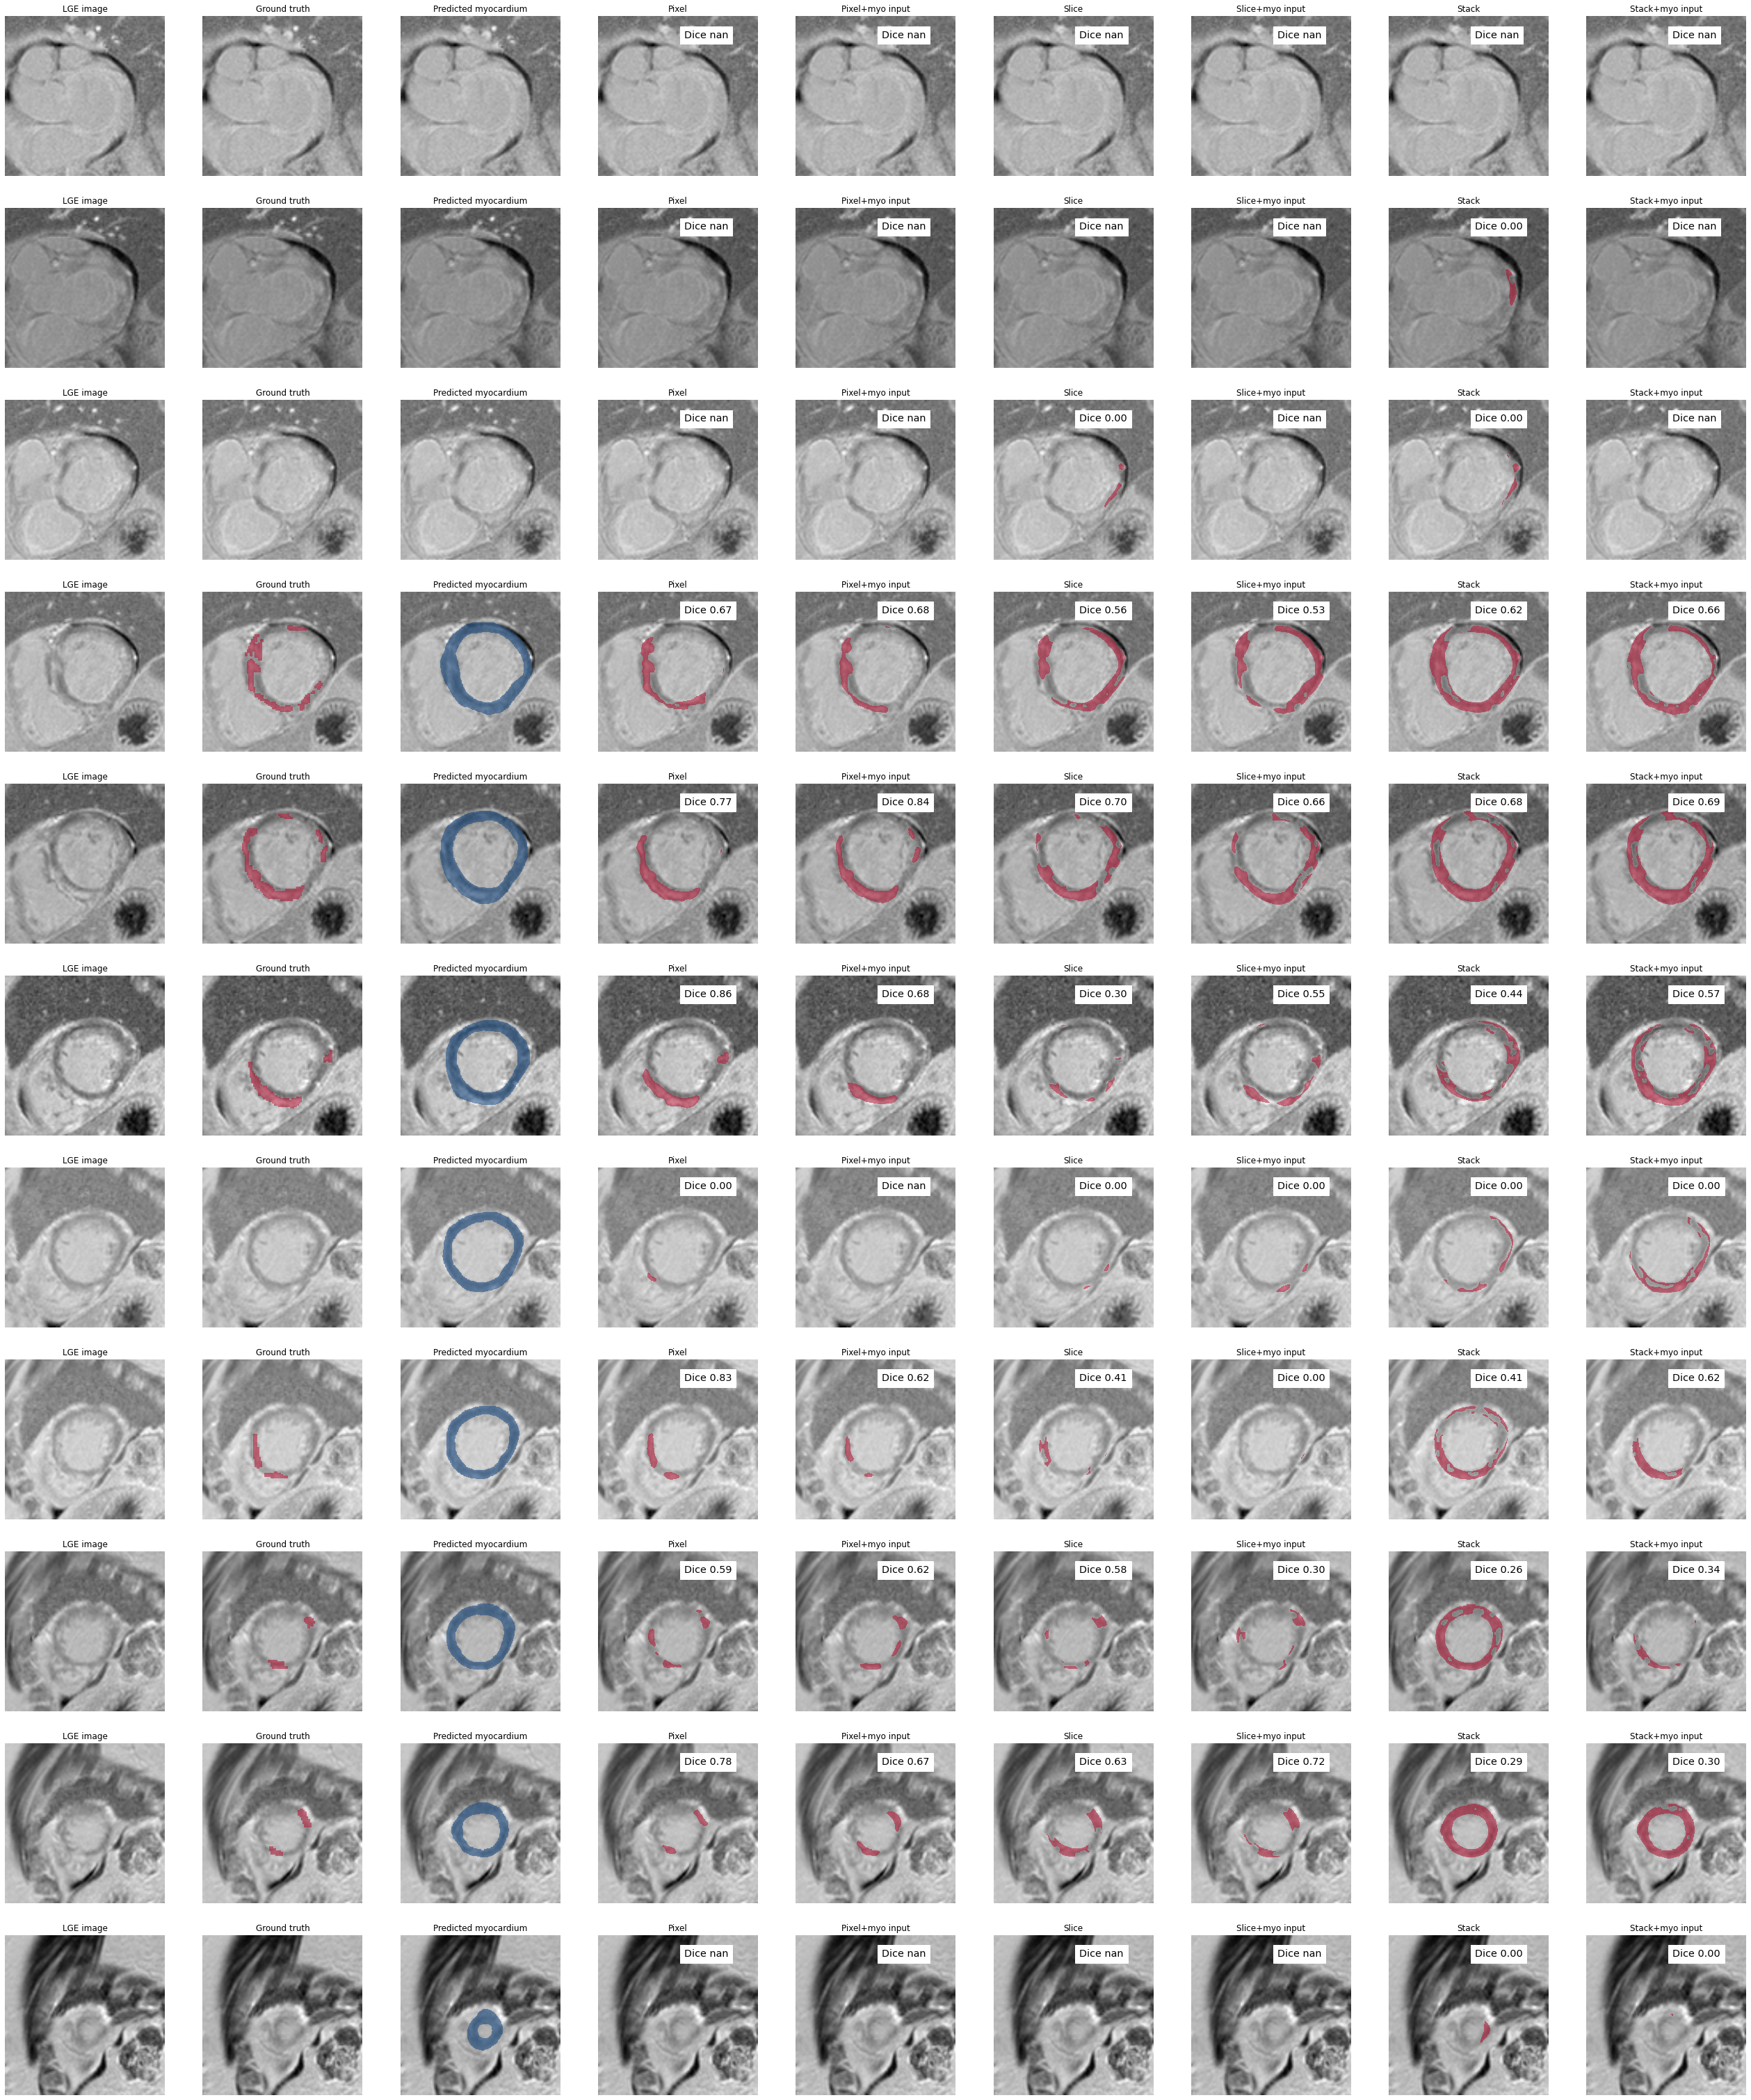

In [45]:
#next(train_seg_examples)
compare_segs(dataset_train, selected_models, model_names, 'DRAUMC0388', max_slices=15, subplot_size=5)

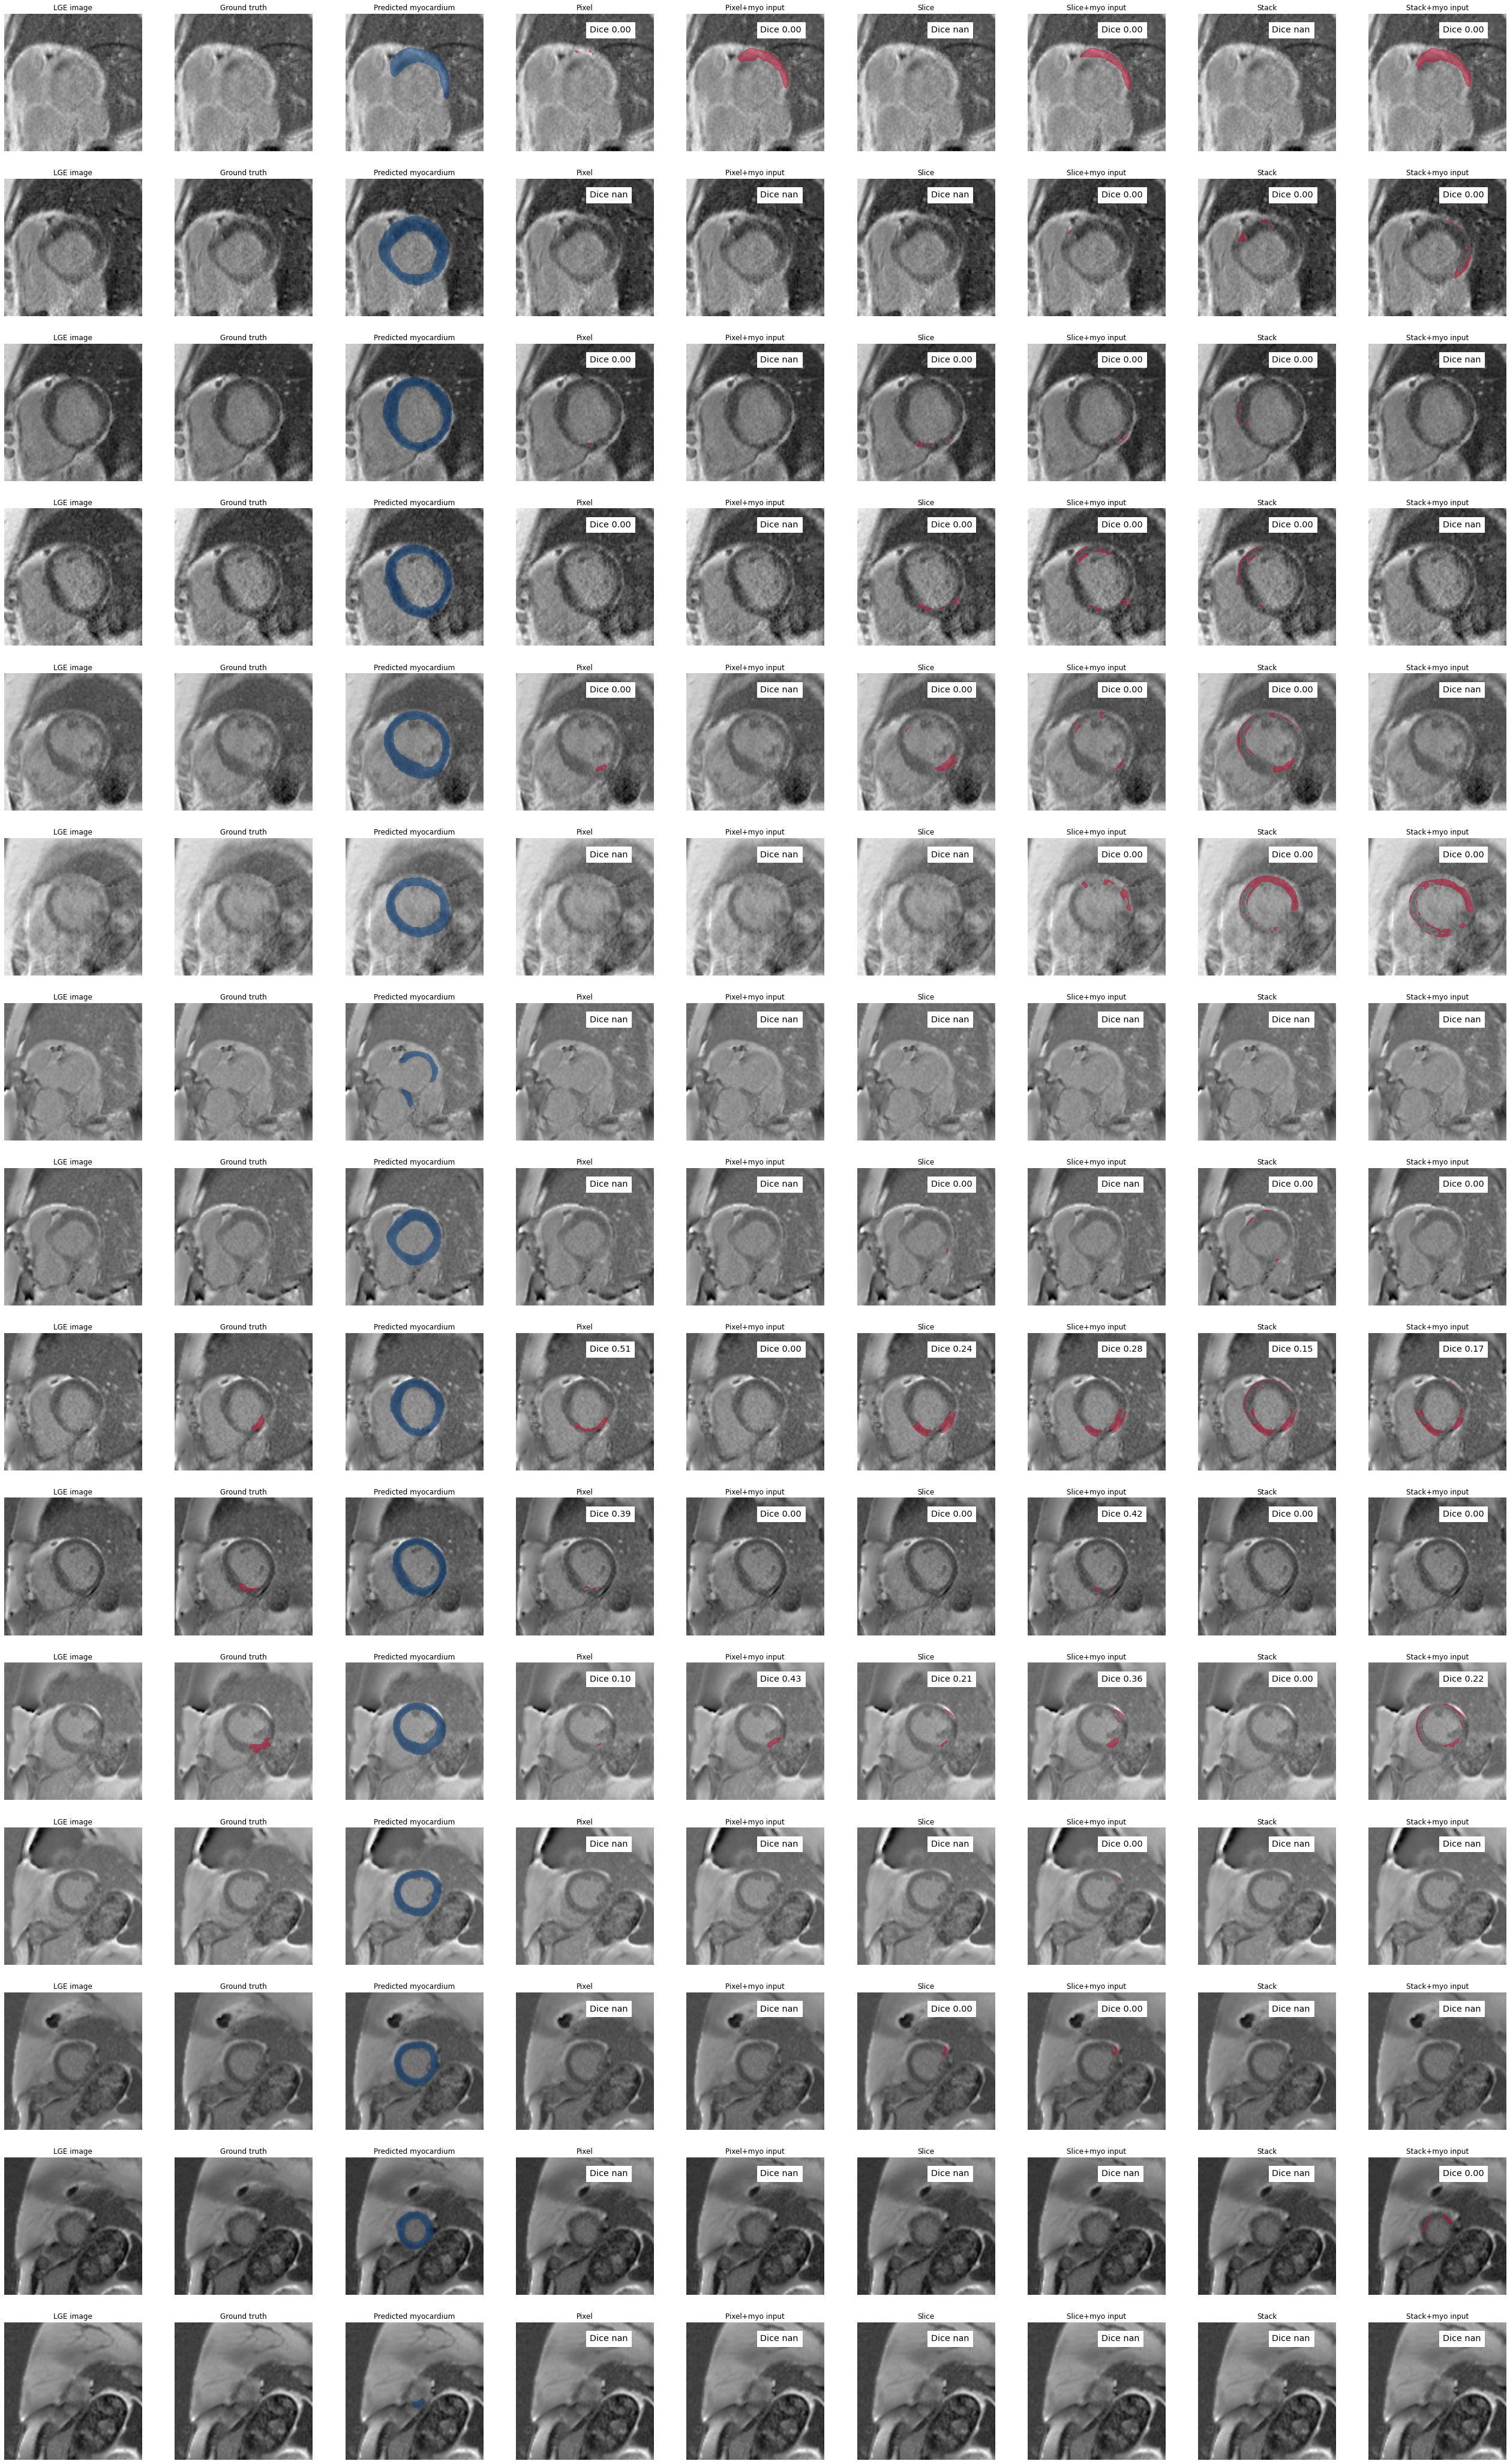

In [39]:
#next(val_seg_examples)
compare_segs(dataset_val, selected_models, model_names, 'DRAUMC0809', max_slices=15, subplot_size=5)

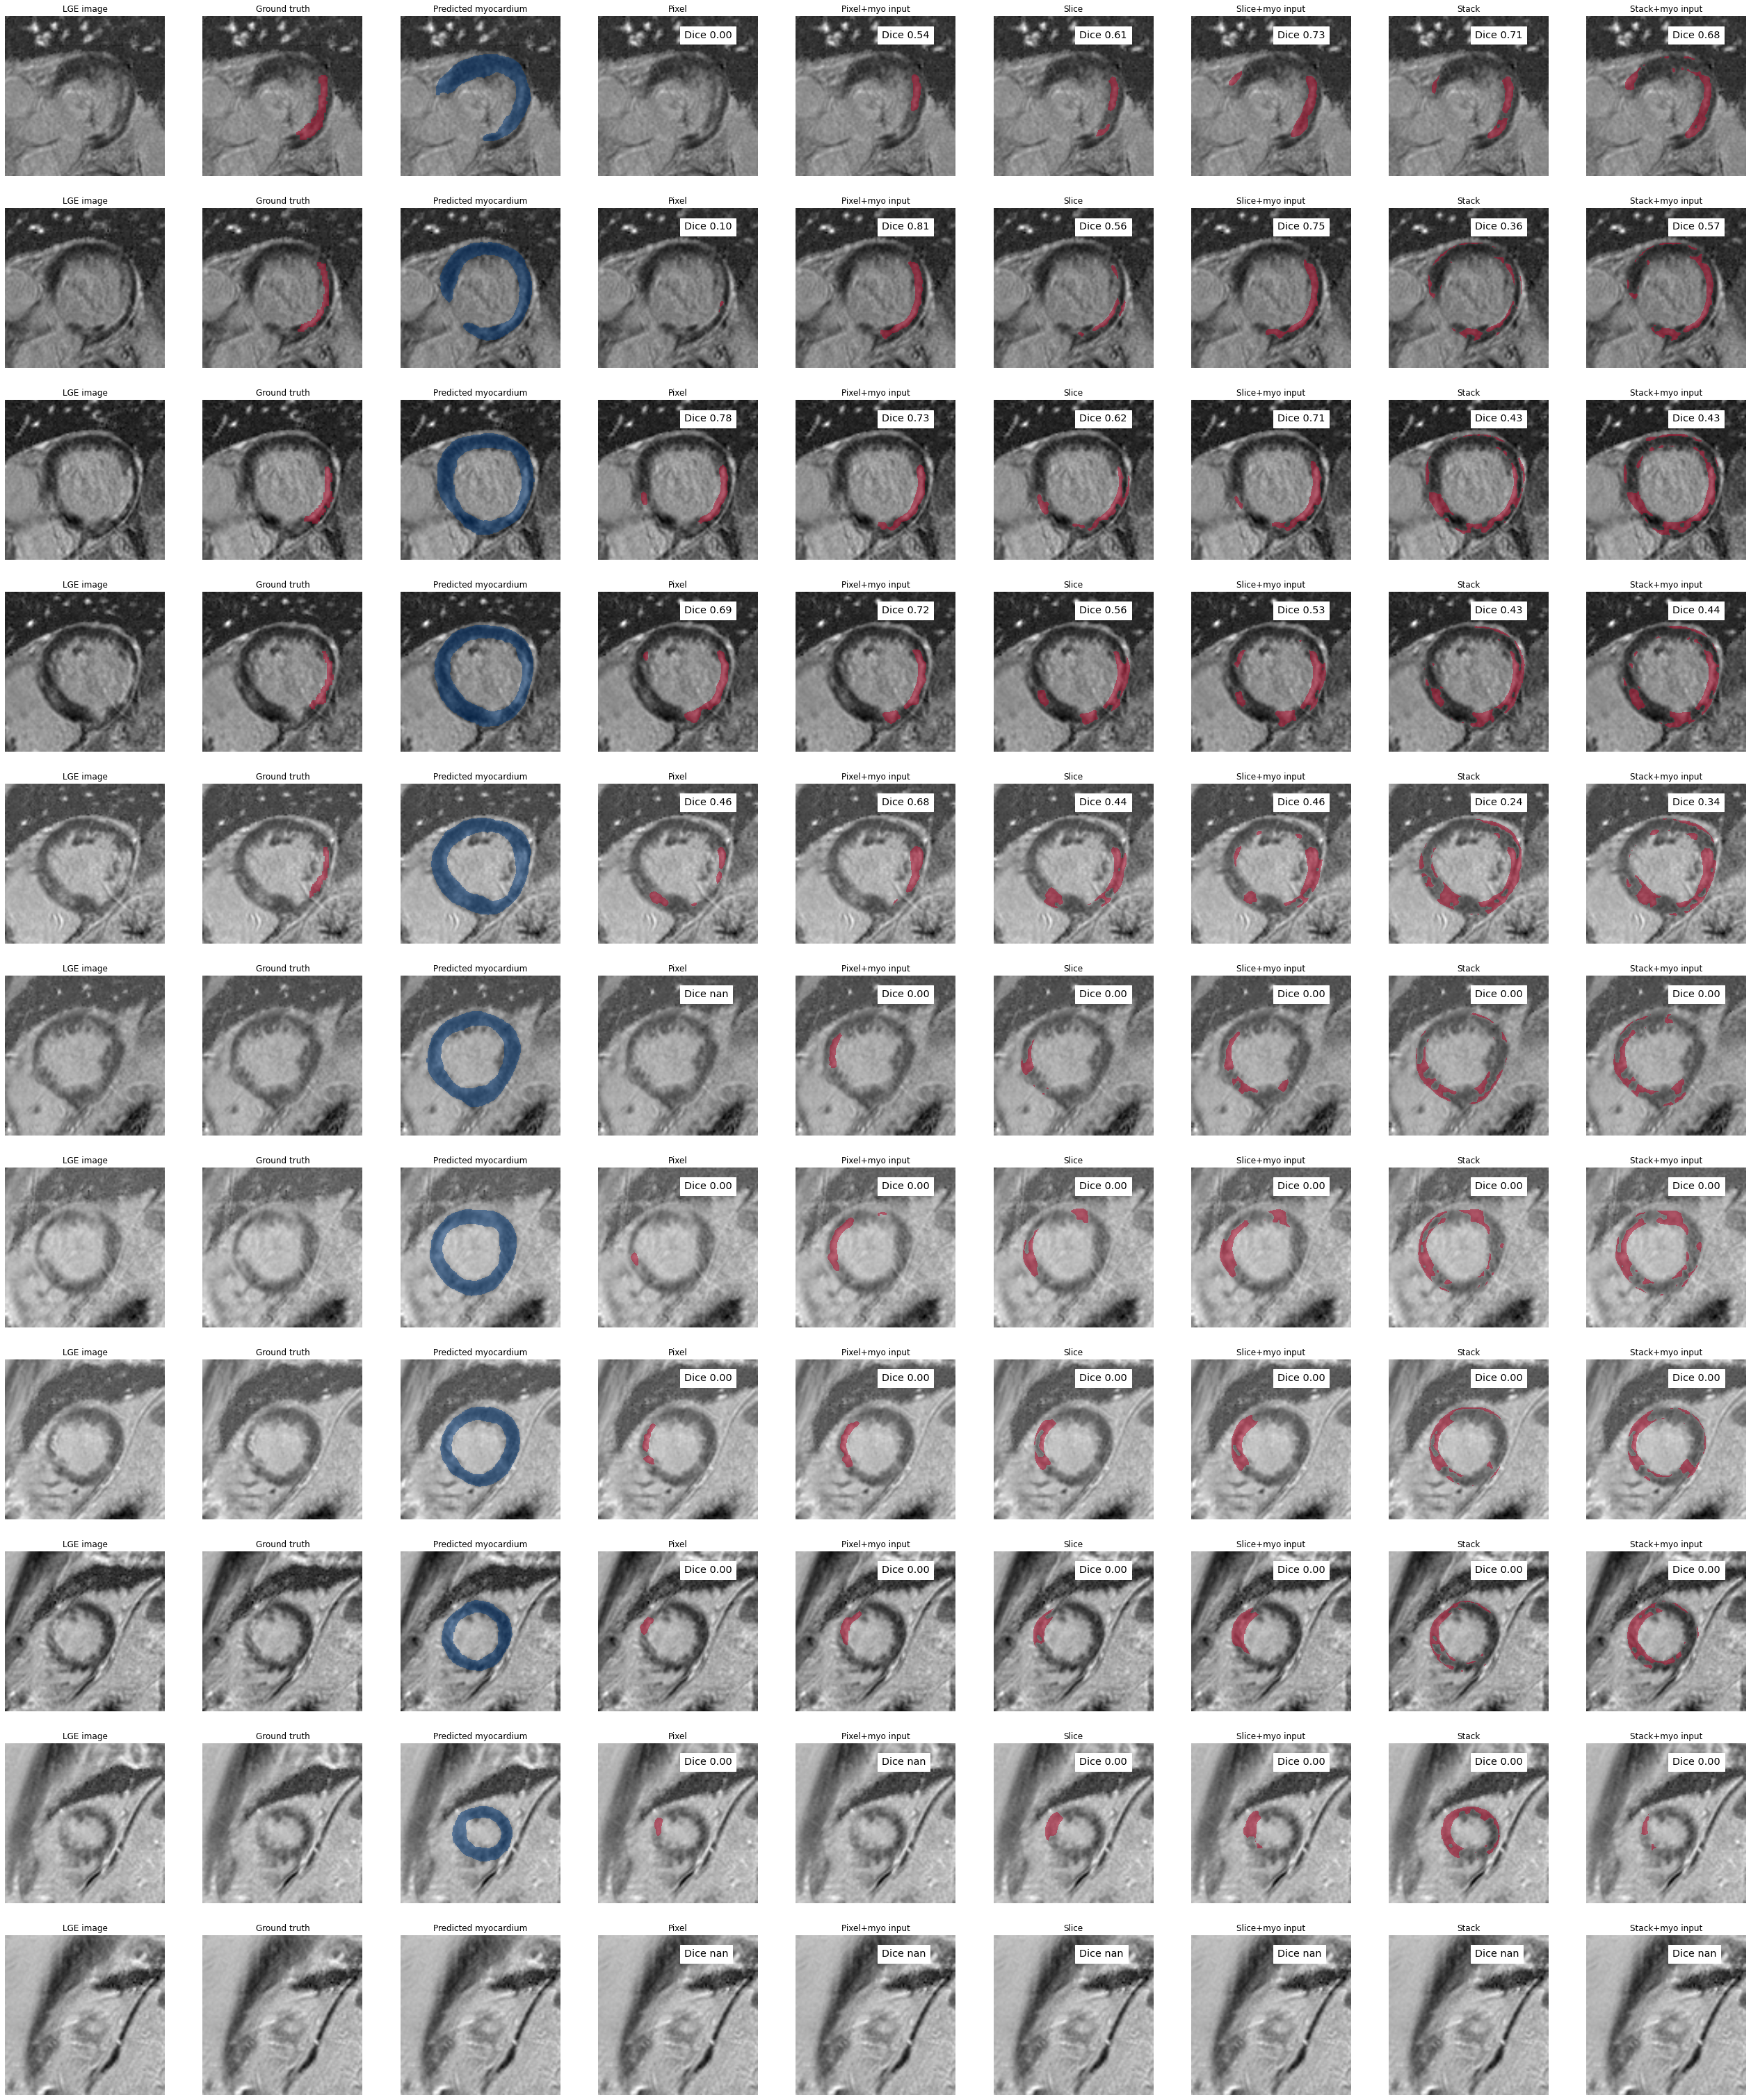

In [40]:
#next(test_seg_examples)
compare_segs(dataset_test, selected_models, model_names, 'DRAUMC0338', max_slices=15, subplot_size=5)

In [46]:
print([True for x in range(10) if x < 5])
def paper_plot_multiple_patients(dataset, nets, net_names, pids, slice_idxs, subplot_size=5, gt_myo_input=False, annotate_dice=False, fib_thresholds=None):
    myo_used = [True if 'stacked' in net.model_name else False for net in nets]
    if fib_thresholds is None:
        fib_thres = [0.5 for net in nets]
    else:
        fib_thres = fib_thresholds
    # collect all images/segmentations
    images = []
    gt_myo_segs = []
    pred_myo_segs = []
    gt_fib_segs = []
    pred_fib_segs = []
    fib_dices_3d = []
    fib_dices_2d = []
    
    for pid, slice_idx in zip(pids, slice_idxs):
        # load batch
        batch = dataset.get_patient_batch(pid)
        image = batch["img"]
        pseudoseg = batch["pseudoseg"]
        pred_myo_seg = batch["myo_seg"]
        gt_myo_seg = batch["gt_myo_seg"]
        gt_fib_seg = batch["gt_seg"]
        batch_path = batch["img_path"]
        batch_slice = batch["slice_idx"]
        # verify that we have a valid ground truth (gt not available filled with -1)
        assert gt_fib_seg[slice_idx].min() >= 0
        assert gt_myo_seg[slice_idx].min() >= 0
        images.append(image[slice_idx][0])
        gt_myo_segs.append(gt_myo_seg[slice_idx][0])
        pred_myo_segs.append(pred_myo_seg[slice_idx][0])
        gt_fib_segs.append(gt_fib_seg[slice_idx][0])
        
        myo_dice_3d = 2*((batch['gt_myo_seg'] > 0.0) * (batch['myo_seg'] > 0.5)).sum() / (((batch['myo_seg'] > 0.5) * (batch['gt_myo_seg'] >= 0) ).sum() + (batch['gt_myo_seg'] > 0.0).sum()).item()
        print(f"{myo_dice_3d=}")
        
        patient_preds = [] 
        patient_fib_dices_3d = []
        patient_fib_dices_2d =[]
        for j, net in enumerate(nets):
            # format model input
            if 'stacked' in net.model_name:
                if gt_myo_input == True:
                    inputs = torch.stack([image.squeeze(1), gt_myo_seg.squeeze(1)], dim=1)
                else:
                    inputs = torch.stack([image.squeeze(1), pred_myo_seg.squeeze(1)], dim=1)
            else:
                inputs = image
            pred, _ = net(inputs)
            pred = pred.detach()
            patient_preds.append(pred[slice_idx][0])
            fib_dice_3d = 2*((gt_fib_seg > 0.5) * (pred > fib_thres[j])).sum() / (((pred > fib_thres[j]) * (gt_fib_seg >= 0) ).sum() + (gt_fib_seg > 0.5).sum()).item()
            patient_fib_dices_3d.append(fib_dice_3d)
        pred_fib_segs.append(patient_preds)
        fib_dices_3d.append(patient_fib_dices_3d)
        
        
        
    
    
    # create fig & axis labels
    n_rows = len(images) 
    n_cols = 2+len(nets)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(subplot_size*n_cols,subplot_size*n_rows))
    
    
    # add a big axis, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    #plt.xlabel("Model supervision/input")
    plt.ylabel("Patient")
    
    plt.subplots_adjust(wspace=0, hspace=0)
    for i, letter in zip(range(n_rows-1, -1, -1), map(chr,range(ord('A'),ord('Z')+1))):
        axs[i, 0].set_ylabel(f"{letter}")
    axs[0, 0].set_title('Image slice')
    axs[0, 1].set_title('Ground truth')
    for j, name in enumerate(net_names):
        axs[0, j+2].set_title(f"{name}")
    for ax in axs.flat:
        ax.set_xticks([], [])
        ax.set_yticks([], [])    
        
    for i in range(n_rows):
        axs[i, 0].imshow(images[i], cmap="gray")
        #axs[i, 0].set_title("LGE image")
        #axs[i, 0].set_axis_off()

        masked_gt_fib_seg = np.ma.masked_where(gt_fib_segs[i] <= 0.0, gt_fib_segs[i] > 0.0)
        masked_gt_myo_seg = np.ma.masked_where(gt_myo_segs[i] <= 0.0, gt_myo_segs[i] > 0.0)
        axs[i, 1].imshow(images[i], cmap="gray")
        axs[i, 1].imshow(masked_gt_myo_seg, cmap="GnBu", alpha=0.8, vmin=0.0, vmax=1)
        axs[i, 1].imshow(masked_gt_fib_seg, cmap="bwr", alpha=0.8, vmin=0.0, vmax=1)
        #axs[i, 1].set_axis_off()
        if annotate_dice == True:
            axs[i, 1].text(120, 40, f"Dice 2D\nDice 3D", fontsize='x-large', color='white', weight='bold')
        
        masked_pred_myo_seg = np.ma.masked_where(pred_myo_segs[i] <= 0.5, pred_myo_segs[i] > 0.5)
        
        #myo_difference = np.ma.masked_where(~np.logical_xor(masked_myo_seg > 0.5, masked_gt_myo_seg > 0.5), np.ones_like(masked_myo_seg) )
        #print(f"{myo_difference.sum()=}")
        #print(f"{np.logical_xor(masked_myo_seg > 0.5, masked_gt_myo_seg > 0.5).sum()=}")
        #axs[i, 1].imshow(myo_difference, cmap="viridis", alpha=1, vmin=0.0, vmax=1)


        for j, pred in enumerate(pred_fib_segs[i]):
            #dice_pred_gt = (((pred[i] > 0.5) * (gt_seg[i] > 0)).sum() * 2) / ((pred[i] > 0.5).sum() + (gt_seg[i] > 0.0).sum())
            axs[i, j+2].imshow(images[i], cmap="gray")
            if myo_used[j] == True:
                axs[i, j+2].imshow(masked_pred_myo_seg, cmap="GnBu", alpha=0.8, vmin=0.0, vmax=1)
            
            masked_pred = np.ma.masked_where(pred_fib_segs[i][j] < fib_thres[j], pred_fib_segs[i][j] >= fib_thres[j])
            axs[i, j+2].imshow(masked_pred, cmap="bwr", alpha=0.8, vmin=0.0, vmax=1)
            #axs[i, j+2].set_title(f"{net_names[j]}")
            #axs[i, j+2].set_axis_off()
            if annotate_dice == True:
                intersection = ((pred_fib_segs[i][j] >= fib_thres[j]) * (gt_fib_segs[i] > 0.5)).sum()
                pred_sum = (pred_fib_segs[i][j] >= fib_thres[j]).sum()
                gt_sum = (gt_fib_segs[i] > 0.5).sum()
                dice = 2 * intersection / (pred_sum + gt_sum)
                axs[i, j+2].text(120, 40, f"{dice:.3f}\n{fib_dices_3d[i][j]:.3f}", fontsize='x-large', color='white', weight='bold')
                #axs[i, j+2].text(120, 30, f"Dice {dice:.2f}", backgroundcolor='white', fontsize='x-large')
            #axs[i, j+2].text(120, 30, f"Dice {dice_pred_gt:.2f}", backgroundcolor='white', fontsize='x-large')

    #axs[-1, 1].xlabel("Ground Truth")
    #plt.setp(axs[-1, 1], xlabel='x axis label')
    #fig.tight_layout()
    
    
    return

[True, True, True, True, True]


myo_dice_3d=tensor(0.8532)
myo_dice_3d=tensor(0.8439)
myo_dice_3d=tensor(0.7643)
myo_dice_3d=tensor(0.6972)
myo_dice_3d=tensor(0.8385)


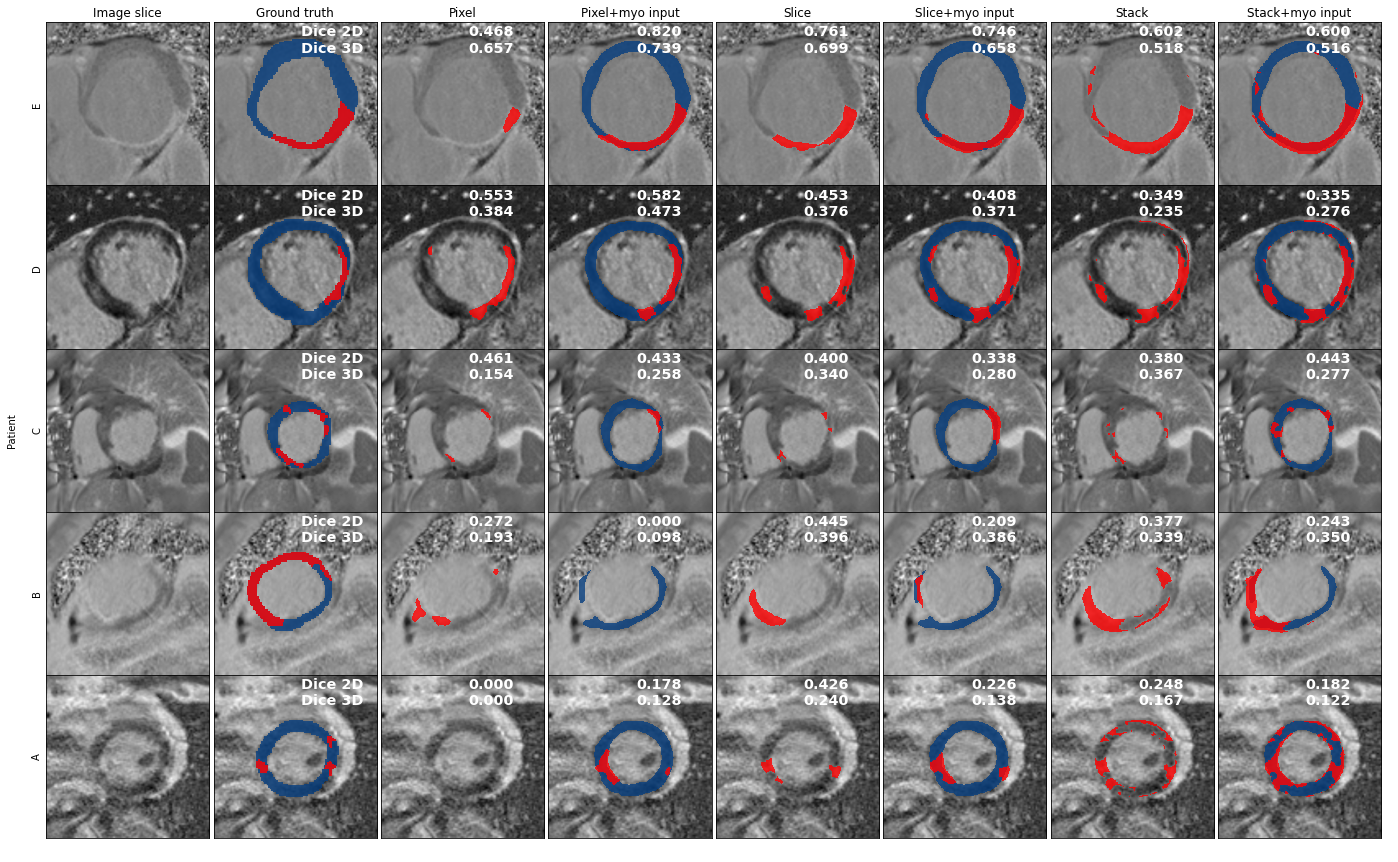

In [42]:
paper_pids = ['DRAUMC0338', 'DRAUMC0503', 'DRAUMC1017', 'DRAUMC0380', 'DRAUMC0270']
paper_slice_idxs = [3, 4, 2, 1, 8]

paper_pids = ['DRAUMC0380', 'DRAUMC0338', 'DRAUMC1017', 'DRAUMC0270', 'DRAUMC0503']
paper_slice_idxs = [1, 3, 2, 8, 4]

paper_plot_multiple_patients(dataset_test, selected_models, model_names, paper_pids, paper_slice_idxs, subplot_size=3, gt_myo_input=False, annotate_dice=True)

In [28]:
def paper_plot_single_patient(dataset, nets, net_names, pid, subplot_size=5, gt_myo_input=False, annotate_dice=False, fib_thresholds=None, gt_only=True, gt_threshold=0.0):
    myo_used = [True if 'stacked' in net.model_name else False for net in nets]
    if fib_thresholds == None:
        fib_thresholds = [0.5 for net in nets]
    # collect all images/segmentations
    images = []
    gt_myo_segs = []
    pred_myo_segs = []
    gt_fib_segs = []
    fib_dices_3d = []
    fib_dices_2d = []
    
    # load batch
    batch = dataset.get_patient_batch(pid)
    image = batch["img"]
    pseudoseg = batch["pseudoseg"]
    pred_myo_seg = batch["myo_seg"]
    gt_myo_seg = batch["gt_myo_seg"]
    gt_fib_seg = batch["gt_seg"]
    batch_path = batch["img_path"]
    batch_slice = batch["slice_idx"]
    
    if gt_only == True:
        slice_idxs = [i for i in range(len(gt_fib_seg)) if gt_fib_seg[i].min() >= 0.0] # no ground truth available is filled with -1
    else:
        slice_idxs = [i for i in range(len(gt_fib_seg))]
    # collect images & ground truth
    for slice_idx in slice_idxs:
        images.append(image[slice_idx][0])
        gt_myo_segs.append(gt_myo_seg[slice_idx][0])
        pred_myo_segs.append(pred_myo_seg[slice_idx][0])
        gt_fib_segs.append(gt_fib_seg[slice_idx][0])
    
    # myo dice
    myo_dice_3d = 2*((batch['gt_myo_seg'] > gt_threshold) * (batch['myo_seg'] > 0.5)).sum() / (((batch['myo_seg'] > 0.5) * (batch['gt_myo_seg'] >= 0) ).sum() + (batch['gt_myo_seg'] > gt_threshold).sum()).item()
    print(f"{myo_dice_3d=}")
    
    # collect model predictions & dice scores
    pred_fib_segs = [[] for slice_idx in slice_idxs]
    for j, net in enumerate(nets):
        # format model input
        if 'stacked' in net.model_name:
            if gt_myo_input == True:
                inputs = torch.stack([image.squeeze(1), gt_myo_seg.squeeze(1)], dim=1)
            else:
                inputs = torch.stack([image.squeeze(1), pred_myo_seg.squeeze(1)], dim=1)
        else:
            inputs = image
        pred, _ = net(inputs)
        pred = pred.detach()
        # 3d dice
        fib_dice_3d = 2*((gt_fib_seg > gt_threshold) * (pred > fib_thresholds[j])).sum() / (((pred > fib_thresholds[j]) * (gt_fib_seg >= 0) ).sum() + (gt_fib_seg > gt_threshold).sum()).item()
        fib_dices_3d.append(fib_dice_3d)
        # per slice predictions
        for i, slice_idx in enumerate(slice_idxs):
            pred_fib_segs[i].append(pred[slice_idx][0])
        
     
    
    # create fig & axis labels
    n_rows = len(images) 
    n_cols = 2+len(nets)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(subplot_size*n_cols,subplot_size*n_rows))
    
    
    # add a big axis, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    #plt.xlabel("Model supervision/input")
    plt.ylabel("Patient slices")
    
    plt.subplots_adjust(wspace=0, hspace=0)
    for i in range(n_rows):
        axs[i, 0].set_ylabel(f"{i}")
    axs[0, 0].set_title('Image slice')
    axs[0, 1].set_title('Ground truth')
    for j, name in enumerate(net_names):
        axs[0, j+2].set_title(f"{name}")
    for ax in axs.flat:
        ax.set_xticks([], [])
        ax.set_yticks([], [])    
        
    for i in range(n_rows):
        axs[i, 0].imshow(images[i], cmap="gray")

        masked_gt_fib_seg = np.ma.masked_where(gt_fib_segs[i] <= gt_threshold, gt_fib_segs[i] > gt_threshold)
        masked_gt_myo_seg = np.ma.masked_where(gt_myo_segs[i] <= gt_threshold, gt_myo_segs[i] > gt_threshold)
        axs[i, 1].imshow(images[i], cmap="gray")
        axs[i, 1].imshow(masked_gt_myo_seg, cmap="GnBu", alpha=0.8, vmin=0.0, vmax=1)
        axs[i, 1].imshow(masked_gt_fib_seg, cmap="bwr", alpha=0.8, vmin=0.0, vmax=1)
        if annotate_dice == True:
            axs[i, 1].text(120, 40, f"Dice 2D\nDice 3D", fontsize='x-large', color='white', weight='bold')
        
        masked_pred_myo_seg = np.ma.masked_where(pred_myo_segs[i] <= 0.5, pred_myo_segs[i] > 0.5)


        for j, pred in enumerate(pred_fib_segs[i]):
            axs[i, j+2].imshow(images[i], cmap="gray")
            if myo_used[j] == True:
                axs[i, j+2].imshow(masked_pred_myo_seg, cmap="GnBu", alpha=0.8, vmin=0.0, vmax=1)
            
            masked_pred = np.ma.masked_where(pred_fib_segs[i][j] < fib_thresholds[j], pred_fib_segs[i][j] >= fib_thresholds[j])
            axs[i, j+2].imshow(masked_pred, cmap="bwr", alpha=0.8, vmin=0.0, vmax=1)
            if annotate_dice == True:
                intersection = ((pred_fib_segs[i][j] >= fib_thresholds[j]) * (gt_fib_segs[i] > 0)).sum()
                pred_sum = (pred_fib_segs[i][j] >= fib_thresholds[j]).sum()
                gt_sum = (gt_fib_segs[i] > 0).sum()
                dice = 2 * intersection / (pred_sum + gt_sum)
                axs[i, j+2].text(120, 40, f"{dice:.3f}\n{fib_dices_3d[j]:.3f}", fontsize='x-large', color='white', weight='bold')

    
    return

dict_keys(['DRAUMC0075', 'DRAUMC0184', 'DRAUMC0270', 'DRAUMC0310', 'DRAUMC0338', 'DRAUMC0380', 'DRAUMC0385', 'DRAUMC0411', 'DRAUMC0435', 'DRAUMC0503', 'DRAUMC0507', 'DRAUMC0518', 'DRAUMC0567', 'DRAUMC0585', 'DRAUMC0634', 'DRAUMC0635', 'DRAUMC0642', 'DRAUMC0673', 'DRAUMC0696', 'DRAUMC1017', 'DRAUMC1042', 'DRAUMC1155', 'DRAUMC1166', 'DRAUMC1199'])
myo_dice_3d=tensor(0.8430)


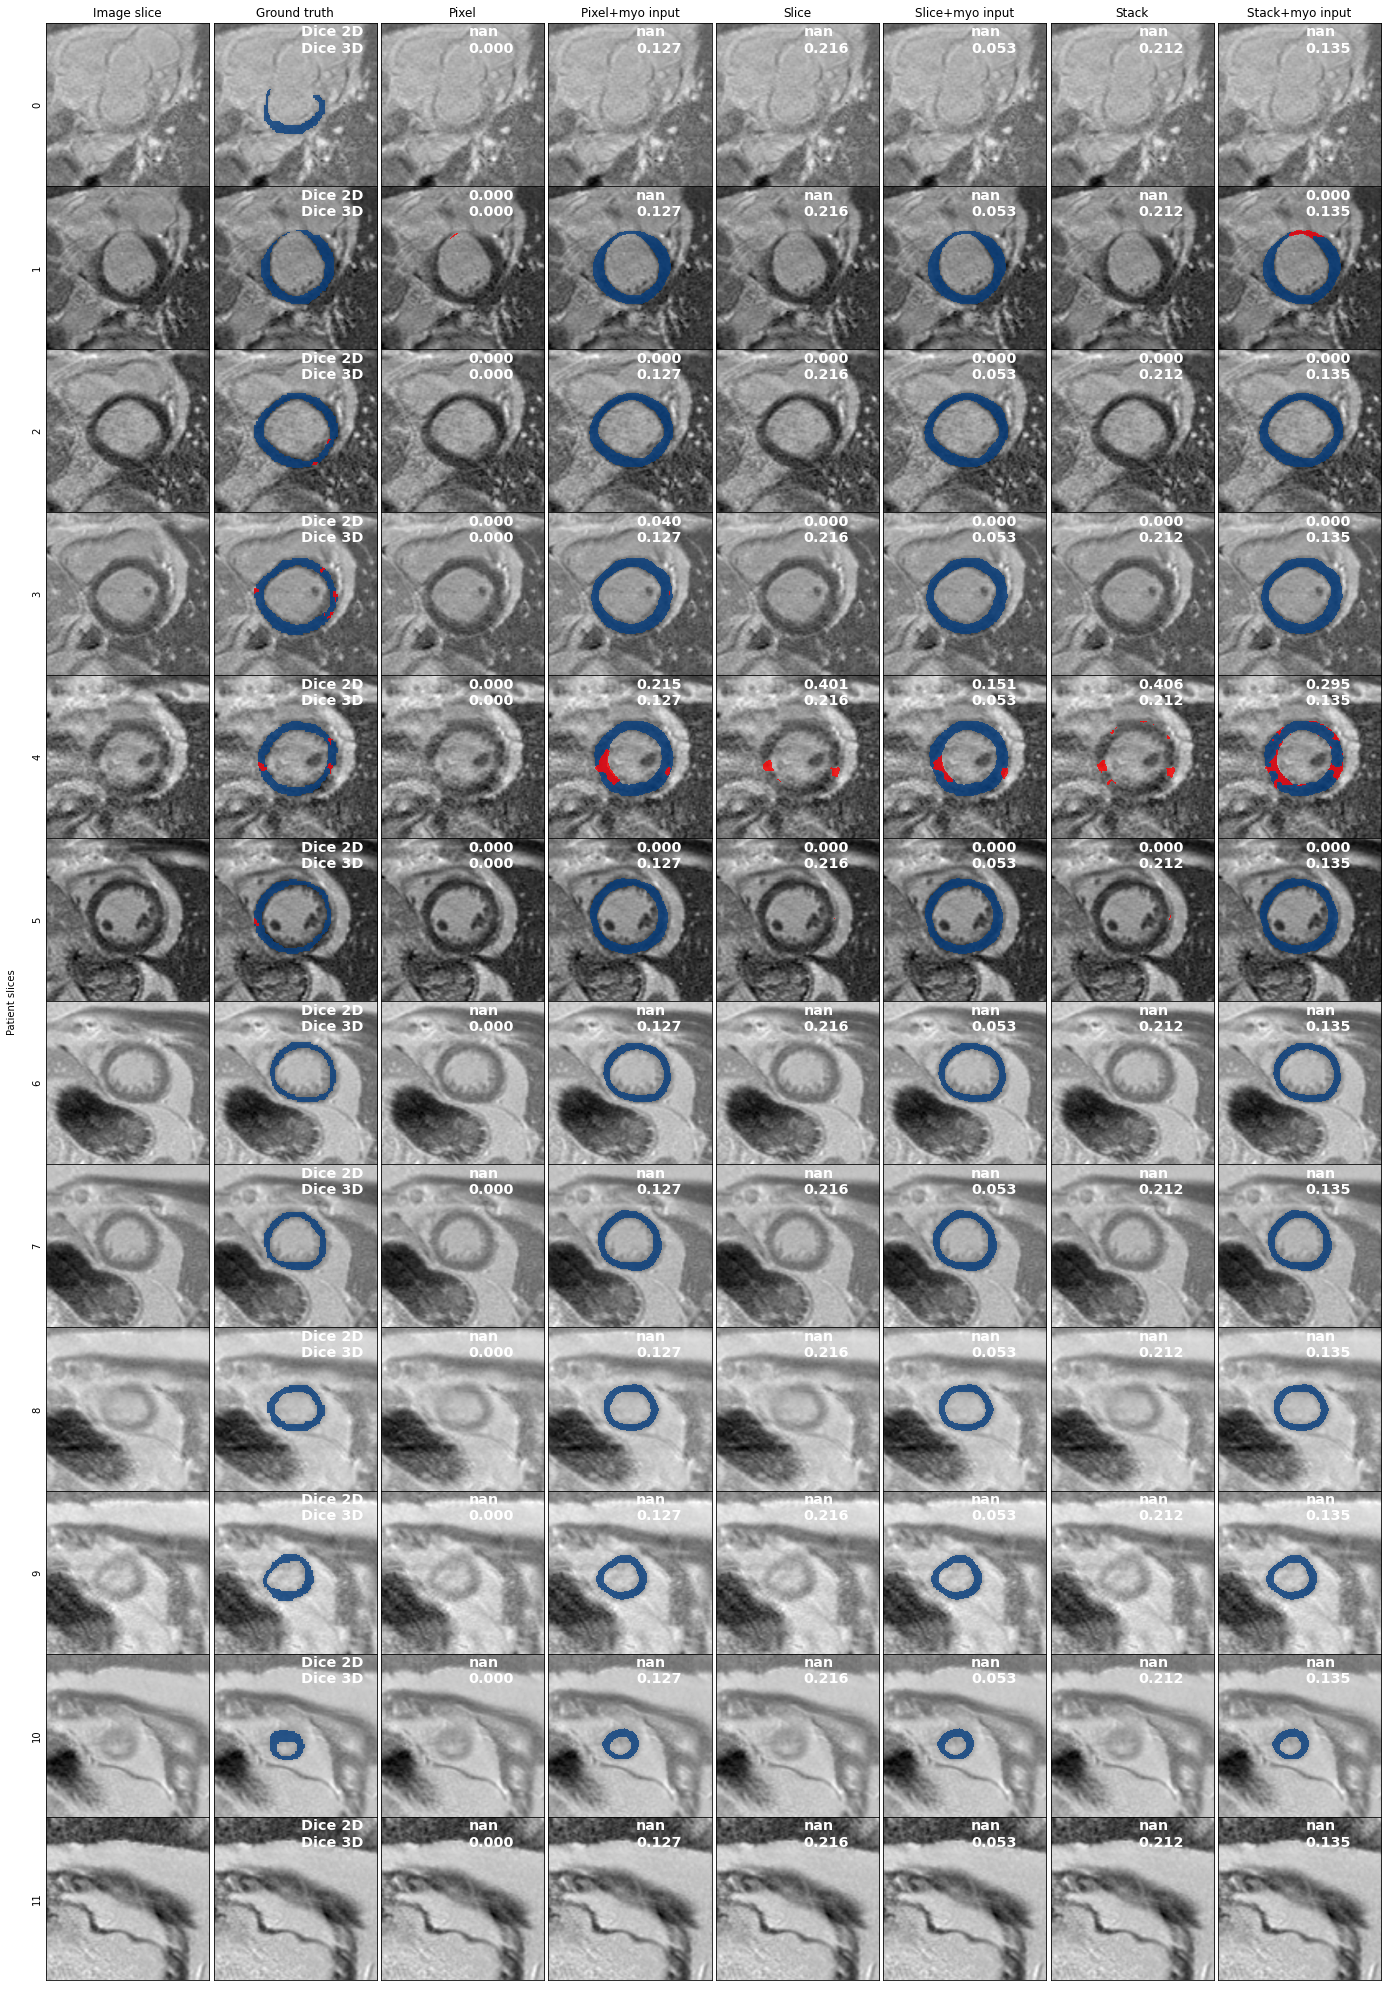

In [47]:
print(dataset_test.id_to_idxs.keys())
paper_plot_single_patient(dataset_test, selected_models, model_names, 
                          'DRAUMC0503', subplot_size=3, 
                          gt_myo_input=False, annotate_dice=True,
                         fib_thresholds=model_thresholds, gt_only=True, gt_threshold=0.8)